train_submissions.csv - This contains 1,55,295 submissions which are selected randomly from 2,21,850 submissions. Contains 3 columns (‘user_id’, ‘problem_id’, ‘attempts_range’). The variable ‘attempts_range’ denoted the range no. in which attempts the user made to get the solution accepted lies.
 

            We have used following criteria to define the attempts_range :-

            attempts_range            No. of attempts lies inside

            1                                         1-1

            2                                         2-3

            3                                         4-5

            4                                         6-7

            5                                         8-9

            6                                         >=10    

user_data.csv - This is the file containing data of users. It contains the following features :-
user_id - unique ID assigned to each user
submission_count - total number of user submissions
problem_solved - total number of accepted user submissions
contribution - user contribution to the judge
country - location of user
follower_count - amount of users who have this user in followers
last_online_time_seconds - time when user was last seen online
max_rating - maximum rating of user
rating - rating of user
rank - can be one of ‘beginner’ ,’intermediate’ , ‘advanced’, ‘expert’
registration_time_seconds - time when user was registered
 

problem_data.csv - This is the file containing data of the problems. It contains the following features :-
problem_id - unique ID assigned to each problem
level_id - the difficulty level of the problem between ‘A’ to ‘N’
points - amount of points for the problem
tags - problem tag(s) like greedy, graphs, DFS etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline 
import os
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import plotly.figure_factory as ff
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [2]:
#reading the source csv files
user_data=pd.read_csv("user_data.csv")
#print(user_data)
problem_data=pd.read_csv("problem_data.csv")
train_data=pd.read_csv("train_submissions.csv")


In [3]:
#profiling
print(user_data.columns)
print(problem_data.columns)
print(train_data.columns)

print(user_data.shape[0])
print(problem_data.shape[0])
print(train_data.shape[0])

Index(['user_id', 'submission_count', 'problem_solved', 'contribution',
       'country', 'follower_count', 'last_online_time_seconds', 'max_rating',
       'rating', 'rank', 'registration_time_seconds'],
      dtype='object')
Index(['problem_id', 'level_type', 'points', 'tags'], dtype='object')
Index(['user_id', 'problem_id', 'attempts_range'], dtype='object')
3571
6544
155295


In [4]:
# Joining 
# first join between user_data and train_data on user_id
merged_inner_1 = pd.merge(left=user_data,right=train_data, left_on='user_id', right_on='user_id')
# second join between merged_inner_1 and problem_data on problem_id
dataset=pd.merge(left=merged_inner_1,right=problem_data, left_on='problem_id', right_on='problem_id')



In [5]:
print(merged_inner_1.columns)
print(merged_inner_1.shape[0])

Index(['user_id', 'submission_count', 'problem_solved', 'contribution',
       'country', 'follower_count', 'last_online_time_seconds', 'max_rating',
       'rating', 'rank', 'registration_time_seconds', 'problem_id',
       'attempts_range'],
      dtype='object')
155295


In [6]:
print(dataset.columns)
print(dataset.shape[0])
print(dataset.shape)

Index(['user_id', 'submission_count', 'problem_solved', 'contribution',
       'country', 'follower_count', 'last_online_time_seconds', 'max_rating',
       'rating', 'rank', 'registration_time_seconds', 'problem_id',
       'attempts_range', 'level_type', 'points', 'tags'],
      dtype='object')
155295
(155295, 16)


In [7]:
dataset.describe()

,submission_count,problem_solved,contribution,follower_count,last_online_time_seconds,max_rating,rating,registration_time_seconds,attempts_range,points
count,155295.000000,155295.000000,155295.000000,155295.000000,1.552950e+05,155295.000000,155295.000000,1.552950e+05,155295.000000,126220.000000
mean,372.235680,336.078695,5.493718,61.064406,1.503666e+09,407.525560,368.623667,1.427513e+09,1.755028,993.302369
std,398.204943,377.378519,19.076626,258.997551,3.867762e+06,99.670629,112.046565,5.033908e+07,1.078450,568.115307
min,1.000000,1.000000,-64.000000,0.000000,1.484239e+09,303.899000,0.000000,1.264761e+09,1.000000,-1.000000
25%,118.000000,99.000000,0.000000,7.000000,1.504118e+09,323.394000,288.131000,1.408458e+09,1.000000,500.000000
50%,237.000000,209.000000,0.000000,20.000000,1.505289e+09,383.028000,356.078000,1.442762e+09,1.000000,1000.000000
75%,480.000000,428.000000,1.000000,52.000000,1.505560e+09,468.463000,445.814000,1.464692e+09,2.000000,1500.000000
max,4570.000000,4476.000000,171.000000,10575.000000,1.505595e+09,983.085000,911.124000,1.484236e+09,6.000000,5000.000000


In [8]:
dataset.head()

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,problem_id,attempts_range,level_type,points,tags
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,prob_75,1,A,500.0,implementation
1,user_1972,107,99,0,India,11,1504291325,304.186,203.842,beginner,1439050893,prob_75,2,A,500.0,implementation
2,user_3317,735,715,0,Vietnam,9,1484278246,419.438,353.211,intermediate,1421847147,prob_75,2,A,500.0,implementation
3,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,prob_75,1,A,500.0,implementation
4,user_872,113,95,0,Bangladesh,7,1504977695,314.220,89.163,beginner,1480081730,prob_75,1,A,500.0,implementation


In [102]:
dataset.shape

(155295, 16)

#Preprocessing 
1. Handling missing data
2. Outlier detection
3. Convert categorical variables to numeric using dummy variables
4. Scaling numerical variables
5. Dimension reduction using correlation

#Missing Data

In [219]:
total = dataset.isnull().sum().sort_values(ascending = False)
null_percentage = (dataset.isnull().sum() / dataset.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, null_percentage], axis=1, keys=['Total', 'Percentage']).transpose()

,country,points,tags,level_type,attempts_range,problem_id,registration_time_seconds,rank,rating,max_rating,last_online_time_seconds,follower_count,contribution,problem_solved,submission_count,user_id
Total,37853.000000,29075.000000,15427.000000,620.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,24.374899,18.722432,9.933997,0.39924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
dataset_cleaned1 = dataset.dropna(axis=0, subset=['tags'])
dataset_cleaned2 = dataset_cleaned1.dropna(axis=0, subset=['level_type'])
dataset_cleaned2['points']= dataset_cleaned2['points'].replace(np.NaN,0)
dataset_cleaned2['country']= dataset_cleaned2['country'].replace(np.NaN,'Unspecified')

final_dataset=dataset_cleaned2

In [13]:
total = final_dataset.isnull().sum().sort_values(ascending = False)
null_percentage = (final_dataset.isnull().sum() / final_dataset.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, null_percentage], axis=1, keys=['Total', 'Percentage']).transpose()

,tags,points,level_type,attempts_range,problem_id,registration_time_seconds,rank,rating,max_rating,last_online_time_seconds,follower_count,country,contribution,problem_solved,submission_count,user_id
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
print(final_dataset.shape)

(139648, 16)


In [39]:
print(final_dataset.head())

     user_id  submission_count  problem_solved  contribution      country  \
0  user_3311                47              40             0  Unspecified   
1  user_1972               107              99             0        India   
2  user_3317               735             715             0      Vietnam   
3  user_2412               169             159             0  Unspecified   
4   user_872               113              95             0   Bangladesh   

   follower_count  last_online_time_seconds  max_rating   rating  \
0               4                1504111645     348.337  330.849   
1              11                1504291325     304.186  203.842   
2               9                1484278246     419.438  353.211   
3               2                1505569083     345.757  345.757   
4               7                1504977695     314.220   89.163   

           rank  registration_time_seconds problem_id  attempts_range  \
0  intermediate                 1466686436    prob_75  

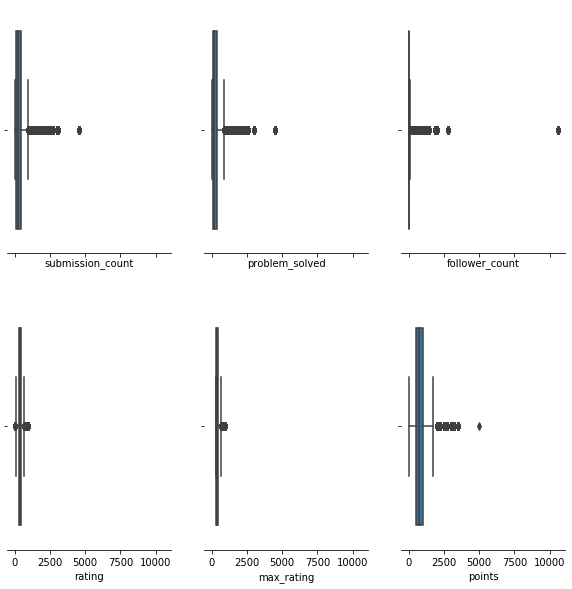

In [52]:
import seaborn as sns

# Set up the matplotlib figure
f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True)
sns.despine(left=True)


sns.boxplot(x=final_dataset['submission_count'],ax=axes[0,0])
sns.boxplot(x=final_dataset['problem_solved'],ax=axes[0,1])
sns.boxplot(x=final_dataset['follower_count'],ax=axes[0,2])
sns.boxplot(x=final_dataset['rating'],ax=axes[1,0])
sns.boxplot(x=final_dataset['max_rating'],ax=axes[1,1])
sns.boxplot(x=final_dataset['points'],ax=axes[1,2])

In [88]:
final_dataset= final_dataset.reset_index(drop=True)
category_variables=['tags','level_type','rank']
numerical_variables=['submission_count','problem_solved','last_online_time_seconds',
                     'max_rating','rating','registration_time_seconds','follower_count','points']

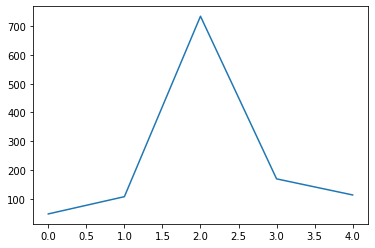

In [57]:
plt.plot(final_dataset['submission_count'])

In [89]:
def preprocessed_categorical_df(X,cat_list):
    for x in cat_list:
        if x=='tags':
            dummies=X[x].str.get_dummies(sep=',')
        else:
            dummies=pd.get_dummies(X[x],prefix=x,dummy_na=False)        
        X=X.drop(x,1)
        X=pd.concat([X,dummies],axis=1)
    return X

In [90]:
def preprocessed_numerical_df(Y,num_list):
      scaler = StandardScaler().fit(Y[num_list].values)
      scaledf = scaler.transform(Y[num_list].values)
      num_df = pd.DataFrame(scaledf, index=Y[num_list].index, columns=Y[num_list].columns)
      for y in num_list:
        Y=Y.drop(y,1)
      Y=pd.concat([Y,num_df],axis=1)
      return Y

In [133]:
final_categorical_dataset=preprocessed_categorical_df(final_dataset,category_variables)
final_data=preprocessed_numerical_df(final_categorical_dataset,numerical_variables)
final_data.columns

Index(['user_id', 'contribution', 'country', 'problem_id', 'attempts_range',
       '*special', '2-sat', 'binary search', 'bitmasks', 'brute force',
       'chinese remainder theorem', 'combinatorics', 'constructive algorithms',
       'data structures', 'dfs and similar', 'divide and conquer', 'dp', 'dsu',
       'expression parsing', 'fft', 'flows', 'games', 'geometry',
       'graph matchings', 'graphs', 'greedy', 'hashing', 'implementation',
       'math', 'matrices', 'meet-in-the-middle', 'number theory',
       'probabilities', 'schedules', 'shortest paths', 'sortings',
       'string suffix structures', 'strings', 'ternary search', 'trees',
       'two pointers', 'level_type_A', 'level_type_B', 'level_type_C',
       'level_type_D', 'level_type_E', 'level_type_F', 'level_type_G',
       'level_type_H', 'level_type_I', 'level_type_J', 'level_type_K',
       'level_type_L', 'level_type_M', 'level_type_N', 'rank_advanced',
       'rank_beginner', 'rank_expert', 'rank_intermediate',

In [127]:
final_data.shape

(139648, 67)

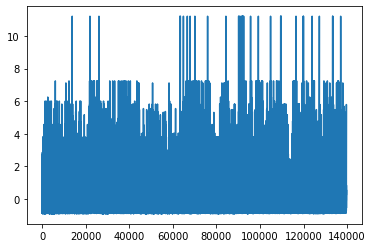

In [92]:
plt.plot(final_data['submission_count'])

#checking the distribution of attempts_range

In [93]:
temp_data = final_data['attempts_range'].value_counts()

In [94]:
df = pd.DataFrame({'Attempts_range': temp_data.index, "values": temp_data.values})
df

,Attempts_range,values
0,1,74776
1,2,42570
2,3,12638
3,4,4889
4,6,2574
5,5,2201


Text(0, 0.5, 'Number of records')

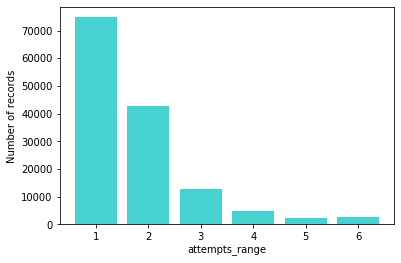

In [194]:
Index = [1,2,3,4]
plt.bar(df['Attempts_range'],df['values'],color=(0.2, 0.8, 0.8, 0.9))
plt.xlabel('attempts_range')
plt.ylabel('Number of records')

In [178]:
from sklearn.utils import resample

# Separate majority and minority classes
majority=[1]
final_data_majority = final_data.loc[final_data['attempts_range'].isin(majority)]
print(final_data_majority.attempts_range.value_counts())

final_data_minority_2 = final_data[final_data.attempts_range==2]
final_data_minority_3 = final_data[final_data.attempts_range==3]
final_data_minority_4 = final_data[final_data.attempts_range==4]
final_data_minority_5 = final_data[final_data.attempts_range==5]
final_data_minority_6 = final_data[final_data.attempts_range==6]
 
# Upsample minority class
df_minority_upsampled_2 = resample(final_data_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=74776,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled_3 = resample(final_data_minority_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=74776,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled_4 = resample(final_data_minority_4, 
                                 replace=True,     # sample with replacement
                                 n_samples=74776,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled_5 = resample(final_data_minority_5, 
                                 replace=True,     # sample with replacement
                                 n_samples=74776,    # to match majority class
                                 random_state=123) # reproducible results
df_minority_upsampled_6 = resample(final_data_minority_6, 
                                 replace=True,     # sample with replacement
                                 n_samples=74776,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([final_data_majority,df_minority_upsampled_2,
                          df_minority_upsampled_3,
                          df_minority_upsampled_4,df_minority_upsampled_5,df_minority_upsampled_6])
 
# Display new class counts
df_upsampled.attempts_range.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    74776
Name: attempts_range, dtype: int64


6    74776
5    74776
4    74776
3    74776
2    74776
1    74776
Name: attempts_range, dtype: int64

In [195]:
df_upsampled.shape

(448656, 67)

In [95]:
vis = go.Bar(x = df['Attempts_range'],y = df['values'],
    name="Distribution of data for different attempt ranges",
    marker=dict(color=("Red","Blue","Yellow","red","blue")),
    text=df['values']
)
data = [vis] 

In [96]:
layout = dict(title = "Distribution of attempt range",
          xaxis = dict(title = 'class', showticklabels=True), 
          yaxis = dict(title = 'Number of Records'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [103]:
final_data.var()

contribution                 329.846940
attempts_range                 1.138287
*special                       0.006227
2-sat                          0.002835
binary search                  0.078476
                                ...    
max_rating                     1.000007
rating                         1.000007
registration_time_seconds      1.000007
follower_count                 1.000007
points                         1.000007
Length: 64, dtype: float64

In [98]:
final_data.shape

(139648, 67)

In [104]:
variance_data= final_data.var()
variance_data

contribution                 329.846940
attempts_range                 1.138287
*special                       0.006227
2-sat                          0.002835
binary search                  0.078476
                                ...    
max_rating                     1.000007
rating                         1.000007
registration_time_seconds      1.000007
follower_count                 1.000007
points                         1.000007
Length: 64, dtype: float64

In [157]:
variance_data= final_data.var()
final_data_columns = final_data.columns
variable = [ ]
for i in range(0,len(variance_data)):
    if variance_data[i]< 0.01:   #setting the threshold as 5%
       variable.append(final_data_columns[i+1])
variable

['problem_id',
 'attempts_range',
 'bitmasks',
 'data structures',
 'dp',
 'dsu',
 'expression parsing',
 'games',
 'implementation',
 'math',
 'number theory',
 'shortest paths',
 'string suffix structures',
 'level_type_D',
 'level_type_E',
 'level_type_F',
 'level_type_G',
 'level_type_H',
 'level_type_I',
 'level_type_J',
 'level_type_K',
 'level_type_L']

In [135]:
# find correlation between fields
corr_matrix=final_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
to_drop.append("country")
print(to_drop)

['rank_intermediate', 'problem_solved', 'max_rating', 'rating', 'country']


In [28]:
final_data.columns

Index(['user_id', 'contribution', 'country', 'follower_count', 'problem_id',
       'attempts_range', 'points', '*special', '2-sat', 'binary search',
       'bitmasks', 'brute force', 'chinese remainder theorem', 'combinatorics',
       'constructive algorithms', 'data structures', 'dfs and similar',
       'divide and conquer', 'dp', 'dsu', 'expression parsing', 'fft', 'flows',
       'games', 'geometry', 'graph matchings', 'graphs', 'greedy', 'hashing',
       'implementation', 'math', 'matrices', 'meet-in-the-middle',
       'number theory', 'probabilities', 'schedules', 'shortest paths',
       'sortings', 'string suffix structures', 'strings', 'ternary search',
       'trees', 'two pointers', 'level_type_A', 'level_type_B', 'level_type_C',
       'level_type_D', 'level_type_E', 'level_type_F', 'level_type_G',
       'level_type_H', 'level_type_I', 'level_type_J', 'level_type_K',
       'level_type_L', 'level_type_M', 'level_type_N', 'rank_advanced',
       'rank_beginner', 'rank_e

In [165]:
# drop columns based on variance and correlation

drop_columns=[
 'bitmasks',
 'dsu',
 'math',
 'number theory',
 'level_type_F',
 'level_type_G',
 'level_type_H',
 'level_type_I',
 'level_type_J',
 'level_type_K',
 'level_type_L','country','rank_intermediate', 'problem_solved', 'max_rating', 'rating','problem_id','user_id'
]

for i in drop_columns:
     final_data_v1=final_data.drop(i,1)


In [166]:
final_data_v1.columns

Index(['contribution', 'country', 'problem_id', 'attempts_range', '*special',
       '2-sat', 'binary search', 'bitmasks', 'brute force',
       'chinese remainder theorem', 'combinatorics', 'constructive algorithms',
       'data structures', 'dfs and similar', 'divide and conquer', 'dp', 'dsu',
       'expression parsing', 'fft', 'flows', 'games', 'geometry',
       'graph matchings', 'graphs', 'greedy', 'hashing', 'implementation',
       'math', 'matrices', 'meet-in-the-middle', 'number theory',
       'probabilities', 'schedules', 'shortest paths', 'sortings',
       'string suffix structures', 'strings', 'ternary search', 'trees',
       'two pointers', 'level_type_A', 'level_type_B', 'level_type_C',
       'level_type_D', 'level_type_E', 'level_type_F', 'level_type_G',
       'level_type_H', 'level_type_I', 'level_type_J', 'level_type_K',
       'level_type_L', 'level_type_M', 'level_type_N', 'rank_advanced',
       'rank_beginner', 'rank_expert', 'rank_intermediate', 'submissio

In [168]:
df_upsampled.shape

(167898, 67)

In [179]:
f_dataset_independent_variables=df_upsampled[[ 'contribution', '*special',
       '2-sat', 'binary search', 'bitmasks', 'brute force',
       'chinese remainder theorem', 'combinatorics', 'constructive algorithms',
       'data structures', 'dfs and similar', 'divide and conquer', 'dp', 'dsu',
       'expression parsing', 'fft', 'flows', 'games', 'geometry',
       'graph matchings', 'graphs', 'greedy', 'hashing', 'implementation',
       'math', 'matrices', 'meet-in-the-middle', 'number theory',
       'probabilities', 'schedules', 'shortest paths', 'sortings',
       'string suffix structures', 'strings', 'ternary search', 'trees',
       'two pointers', 'level_type_A', 'level_type_B', 'level_type_C',
       'level_type_D', 'level_type_E', 'level_type_F', 'level_type_G',
       'level_type_H', 'level_type_I', 'level_type_J', 'level_type_K',
       'level_type_L', 'level_type_M', 'level_type_N', 'rank_advanced',
       'rank_beginner', 'rank_expert', 'rank_intermediate', 'submission_count',
       'problem_solved', 'last_online_time_seconds', 'max_rating', 'rating',
       'registration_time_seconds', 'follower_count', 'points']]

In [181]:
f_dataset_dependent_variable=df_upsampled['attempts_range']

In [196]:
f_dataset_independent_variables.shape

(448656, 63)

## Using ML classifiers

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from nltk.classify.scikitlearn import SklearnClassifier #

In [174]:
Classifiers = [
    KNeighborsClassifier(100),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1,
                           random_state=None, verbose=0, warm_start=False,class_weight=None),
    GaussianNB()
]

In [183]:
dense_features=X_train
dense_test= X_test
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(X_train,Y_train)
        pred = fit.predict(X_test)
        # creating a confusion matrix   
        cm = confusion_matrix(y_test, pred) 
        print(cm)
    except Exception:
        fit = classifier.fit(dense_features,Y_train)
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,Y_test)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))  

[[ 9540  2438  2169  2743  3210  2258]
 [ 5645  3328  2759  3505  4068  3067]
 [ 3633  2012  4660  3863  4562  3788]
 [ 2408  1419  2352  8168  4273  3829]
 [ 1486   764  1531  2461 12681  3513]
 [ 1015   814  1397  2397  3769 13072]]
Accuracy of KNeighborsClassifieris 0.38224477514357674
[[11874  5897  2570  1082   488   447]
 [ 3983 16075  1184   621   268   241]
 [  488   374 21154   237   141   124]
 [   43    27    15 22175   104    85]
 [    0     0     0     9 22391    36]
 [    0    10    15    11    62 22366]]
Accuracy of DecisionTreeClassifieris 0.8620920228534068
[[14461  5290  1652   519   219   217]
 [ 4093 16514  1035   403   189   138]
 [  433   392 21219   239   124   111]
 [   43    27    14 22176   104    85]
 [    0     0     0     9 22391    36]
 [    0    10    15    11    62 22366]]
Accuracy of RandomForestClassifieris 0.8850643030676761
[[ 1985    23    96  2282 16179  1793]
 [ 1182    43   128  2708 16022  2289]
 [  875    12   135  2535 16266  2695]
 [  674    

Text(0.5, 1.0, 'Accuracies of Models')

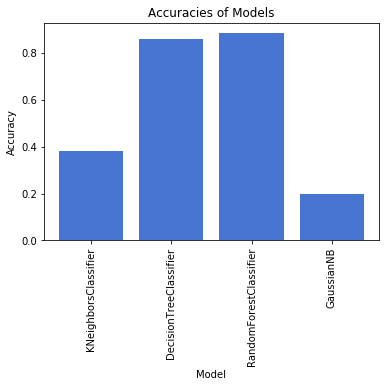

In [189]:
## Plot the accuracy of the classifiers

Index = [1,2,3,4]
plt.bar(Index,Accuracy,color=(0.2, 0.4, 0.8, 0.9))
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

In [199]:
## Choose the best model for predictions
## RandomForest Classifier

classifier=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None,bootstrap=True, oob_score=False, n_jobs=1,
                           random_state=None, verbose=0, warm_start=False,class_weight=None)

fit = classifier.fit(X_train,Y_train)
y_pred = fit.predict(X_test)
        # creating a confusion matrix   
cm = confusion_matrix(y_test, pred) 

NameError: name 'plot_confusion_matrix' is not defined

In [232]:
cmx =[[ 1985,    23,    96,  2282, 16179,  1793],
 [ 1182,    43,   128,  2708, 16022,  2289],
 [  875,    12,   135,  2535, 16266,  2695],
 [  674,    10,    65,  2482, 16109,  3109],
 [  557,     0,    61,  1724, 16233,  3861],
 [  503,     7,    61,  1699, 14292,  5902]]
df_cm = pd.DataFrame(cmx, index = [i for i in range(1,7)],
                  columns = [i for i in range(1,7)])

df_cm

,1,2,3,4,5,6
1,1985,23,96,2282,16179,1793
2,1182,43,128,2708,16022,2289
3,875,12,135,2535,16266,2695
4,674,10,65,2482,16109,3109
5,557,0,61,1724,16233,3861
6,503,7,61,1699,14292,5902


In [210]:
print(cm)

[[ 1985    23    96  2282 16179  1793]
 [ 1182    43   128  2708 16022  2289]
 [  875    12   135  2535 16266  2695]
 [  674    10    65  2482 16109  3109]
 [  557     0    61  1724 16233  3861]
 [  503     7    61  1699 14292  5902]]


In [202]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16322057698165635
Mean Squared Error: 0.3067156028737639
Root Mean Squared Error: 0.5538191066347964


In [203]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[14481  5308  1631   503   221   214]
 [ 4211 16352  1076   400   197   136]
 [  421   394 21232   224   128   119]
 [   43    11    13 22181   108    93]
 [    0     0     0     0 22400    36]
 [    0    10    15     0    62 22377]]
              precision    recall  f1-score   support

           1       0.76      0.65      0.70     22358
           2       0.74      0.73      0.74     22372
           3       0.89      0.94      0.91     22518
           4       0.95      0.99      0.97     22449
           5       0.97      1.00      0.98     22436
           6       0.97      1.00      0.98     22464

    accuracy                           0.88    134597
   macro avg       0.88      0.88      0.88    134597
weighted avg       0.88      0.88      0.88    134597

0.8842916261135092


In [217]:
test_data=pd.read_csv("test_submissions_NeDLEvX.csv")
# Joining 
# first join between user_data and train_data on user_id
merged_inner_test = pd.merge(left=user_data,right=test_data, left_on='user_id', right_on='user_id')
# second join between merged_inner_1 and problem_data on problem_id
dataset_test=pd.merge(left=merged_inner_test,right=problem_data, left_on='problem_id', right_on='problem_id')

In [218]:
dataset_test

,user_id,submission_count,problem_solved,contribution,country,follower_count,last_online_time_seconds,max_rating,rating,rank,registration_time_seconds,ID,problem_id,level_type,points,tags
0,user_3311,47,40,0,NaN,4,1504111645,348.337,330.849,intermediate,1466686436,user_3311_prob_5901,prob_5901,A,500.0,"brute force,implementation"
1,user_2412,169,159,0,NaN,2,1505569083,345.757,345.757,intermediate,1429008478,user_2412_prob_5901,prob_5901,A,500.0,"brute force,implementation"
2,user_258,96,84,0,Indonesia,3,1496638809,326.261,253.727,beginner,1460555438,user_258_prob_5901,prob_5901,A,500.0,"brute force,implementation"
3,user_3267,108,84,0,NaN,2,1505540869,310.493,183.773,beginner,1461340813,user_3267_prob_5901,prob_5901,A,500.0,"brute force,implementation"
4,user_1524,67,49,-7,NaN,0,1505404933,316.514,185.206,beginner,1470158002,user_1524_prob_5901,prob_5901,A,500.0,"brute force,implementation"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66550,user_1638,365,296,3,Kazakhstan,56,1505488049,397.649,328.555,intermediate,1472663259,user_1638_prob_6320,prob_6320,J,NaN,NaN
66551,user_1209,840,782,157,Poland,959,1505391741,735.665,663.704,expert,1369775813,user_1209_prob_1369,prob_1369,B,NaN,NaN
66552,user_1209,840,782,157,Poland,959,1505391741,735.665,663.704,expert,1369775813,user_1209_prob_1075,prob_1075,D,NaN,NaN
66553,user_1209,840,782,157,Poland,959,1505391741,735.665,663.704,expert,1369775813,user_1209_prob_2134,prob_2134,D,NaN,NaN


In [220]:
total_test = dataset_test.isnull().sum().sort_values(ascending = False)
null_percentage = (dataset_test.isnull().sum() / dataset_test.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total_test, null_percentage], axis=1, keys=['Total', 'Percentage']).transpose()

,country,points,tags,level_type,problem_id,ID,registration_time_seconds,rank,rating,max_rating,last_online_time_seconds,follower_count,contribution,problem_solved,submission_count,user_id
Total,16162.000000,12484.000000,6612.000000,285.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,24.283675,18.757419,9.934641,0.428217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
dataset_cleaned1_t = dataset_test.dropna(axis=0, subset=['tags'])
dataset_cleaned2_t = dataset_cleaned1_t.dropna(axis=0, subset=['level_type'])
dataset_cleaned2_t['points']= dataset_cleaned2_t['points'].replace(np.NaN,0)
dataset_cleaned2_t['country']= dataset_cleaned2_t['country'].replace(np.NaN,'Unspecified')

final_dataset_test=dataset_cleaned2_t
final_dataset_test.shape

(59831, 16)

In [222]:
final_categorical_dataset_t=preprocessed_categorical_df(final_dataset_test,category_variables)
final_data_test=preprocessed_numerical_df(final_categorical_dataset_t,numerical_variables)
final_data_test.columns

Index(['user_id', 'contribution', 'country', 'ID', 'problem_id', '*special',
       '2-sat', 'binary search', 'bitmasks', 'brute force',
       'chinese remainder theorem', 'combinatorics', 'constructive algorithms',
       'data structures', 'dfs and similar', 'divide and conquer', 'dp', 'dsu',
       'expression parsing', 'fft', 'flows', 'games', 'geometry',
       'graph matchings', 'graphs', 'greedy', 'hashing', 'implementation',
       'math', 'matrices', 'meet-in-the-middle', 'number theory',
       'probabilities', 'schedules', 'shortest paths', 'sortings',
       'string suffix structures', 'strings', 'ternary search', 'trees',
       'two pointers', 'level_type_A', 'level_type_B', 'level_type_C',
       'level_type_D', 'level_type_E', 'level_type_F', 'level_type_G',
       'level_type_H', 'level_type_I', 'level_type_J', 'level_type_K',
       'level_type_L', 'level_type_M', 'level_type_N', 'rank_advanced',
       'rank_beginner', 'rank_expert', 'rank_intermediate', 'submission

In [223]:
f_dataset_independent_variables_test=final_data_test[[ 'contribution', '*special',
       '2-sat', 'binary search', 'bitmasks', 'brute force',
       'chinese remainder theorem', 'combinatorics', 'constructive algorithms',
       'data structures', 'dfs and similar', 'divide and conquer', 'dp', 'dsu',
       'expression parsing', 'fft', 'flows', 'games', 'geometry',
       'graph matchings', 'graphs', 'greedy', 'hashing', 'implementation',
       'math', 'matrices', 'meet-in-the-middle', 'number theory',
       'probabilities', 'schedules', 'shortest paths', 'sortings',
       'string suffix structures', 'strings', 'ternary search', 'trees',
       'two pointers', 'level_type_A', 'level_type_B', 'level_type_C',
       'level_type_D', 'level_type_E', 'level_type_F', 'level_type_G',
       'level_type_H', 'level_type_I', 'level_type_J', 'level_type_K',
       'level_type_L', 'level_type_M', 'level_type_N', 'rank_advanced',
       'rank_beginner', 'rank_expert', 'rank_intermediate', 'submission_count',
       'problem_solved', 'last_online_time_seconds', 'max_rating', 'rating',
       'registration_time_seconds', 'follower_count', 'points']]

In [224]:
y_pred_test = fit.predict(f_dataset_independent_variables_test)
        # creating a confusion matrix   


In [225]:
y_pred_test

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [228]:
test_result=pd.DataFrame()
test_result['user_id']=final_data_test['user_id']
test_result['problem_id']=final_data_test['problem_id']
test_result['attempt_range']=y_pred_test

In [229]:
test_result

,user_id,problem_id,attempt_range
0,user_3311,prob_5901,1
1,user_2412,prob_5901,1
2,user_258,prob_5901,1
3,user_3267,prob_5901,2
4,user_1524,prob_5901,5
...,...,...,...
66516,user_944,prob_3583,2
66517,user_745,prob_2363,1
66523,user_3048,prob_5921,1
66537,user_3551,prob_2332,1


In [230]:
test_result.attempt_range.value_counts()

1    35341
2    16621
3     5121
4     1451
6      697
5      600
Name: attempt_range, dtype: int64

In [231]:
test_result.to_csv("test_result.csv")